In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [85]:
Train = pd.read_csv('Train_SU63ISt.csv')
Test = pd.read_csv('Test_0qrQsBZ.csv')

In [86]:
Train.columns,Test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [87]:
Train.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [88]:
Test.head(3)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00


In [89]:
Train.dtypes,Test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [90]:
Train.shape,Test.shape

((18288, 3), (5112, 2))

In [91]:
Train['Datetime'] = pd.to_datetime(Train['Datetime'],format='%d-%m-%Y %H:%M')
Test['Datetime'] = pd.to_datetime(Test['Datetime'],format='%d-%m-%Y %H:%M')

In [92]:
Train.dtypes,Test.dtypes

(ID                   int64
 Datetime    datetime64[ns]
 Count                int64
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 dtype: object)

In [93]:
for dataframes in (Train,Test):
    dataframes['Year'] = dataframes['Datetime'].dt.year
    dataframes['Month'] = dataframes['Datetime'].dt.month
    dataframes['Day'] = dataframes['Datetime'].dt.day
    dataframes['Hour'] = dataframes['Datetime'].dt.hour
    dataframes['Day of Week'] = dataframes['Datetime'].dt.dayofweek
    dataframes['Weekend'] = 0
    dataframes['Weekend'][(dataframes['Day of Week']==5)|(dataframes['Day of Week']==6)] = 1

In [94]:
Train['Weekend'].value_counts()

0    13056
1     5232
Name: Weekend, dtype: int64

In [96]:
Train.head(2)

,ID,Datetime,Count,Year,Month,Day,Hour,Day of Week,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


In [97]:
Train_Original = Train.copy()
Test_Original = Test.copy()

In [98]:
del Train['ID']

In [99]:
Train.head(2)

,Datetime,Count,Year,Month,Day,Hour,Day of Week,Weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


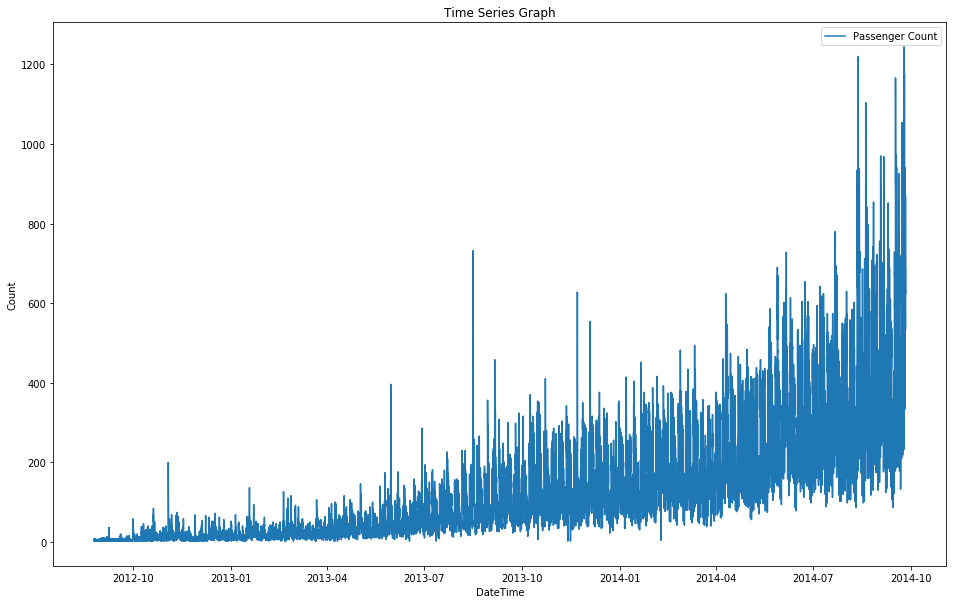

In [100]:
plt.figure(figsize=(16,10))
plt.plot(Train['Datetime'],Train['Count'],label='Passenger Count')
plt.title('Time Series Graph')
plt.xlabel('DateTime')
plt.ylabel('Count')
plt.legend(loc='best')

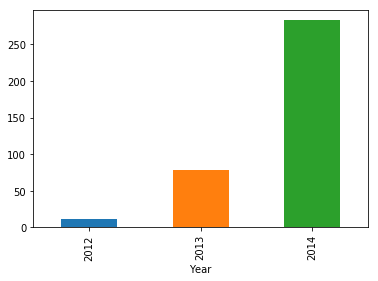

In [101]:
Train.groupby('Year')['Count'].mean().plot.bar()

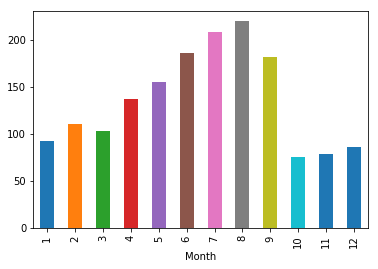

In [102]:
Train.groupby('Month')['Count'].mean().plot.bar()

In [103]:
temp = Train.groupby(['Year','Month'])['Count'].mean()

Text(0,0.5,'Count')

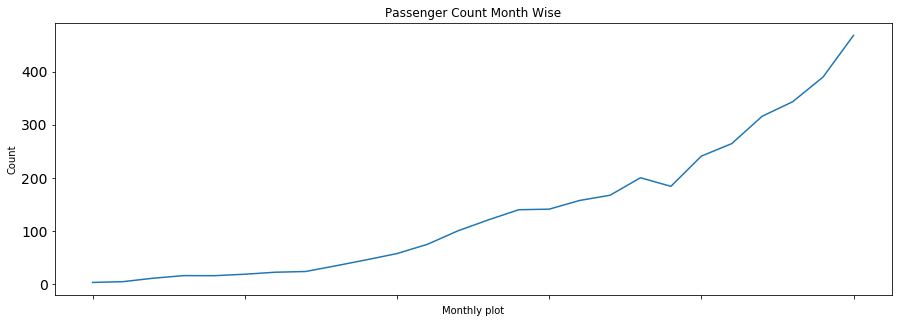

In [104]:
temp.plot(figsize=(15,5),title='Passenger Count Month Wise',fontsize=14)
plt.xlabel('Monthly plot')
plt.ylabel('Count')

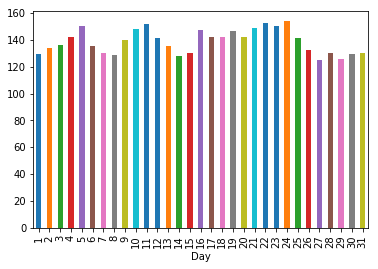

In [105]:
Train.groupby('Day')['Count'].mean().plot.bar()

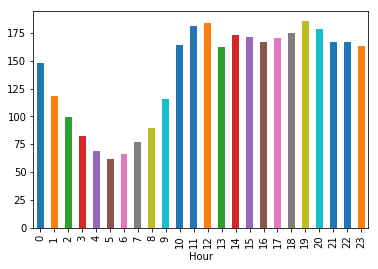

In [106]:
Train.groupby('Hour')['Count'].mean().plot.bar()

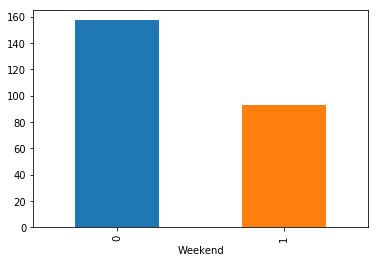

In [107]:
Train.groupby('Weekend')['Count'].mean().plot.bar()

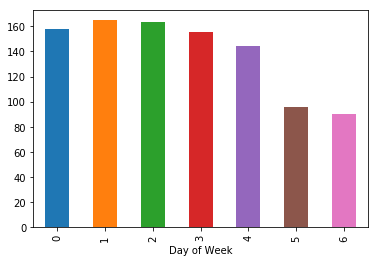

In [108]:
Train.groupby('Day of Week')['Count'].mean().plot.bar()

In [110]:
Train.index = Train['Datetime']

In [111]:
hourly = Train.resample('H').mean()
daily = Train.resample('D').mean()
weekly = Train.resample('W').mean()
monthly = Train.resample('M').mean()

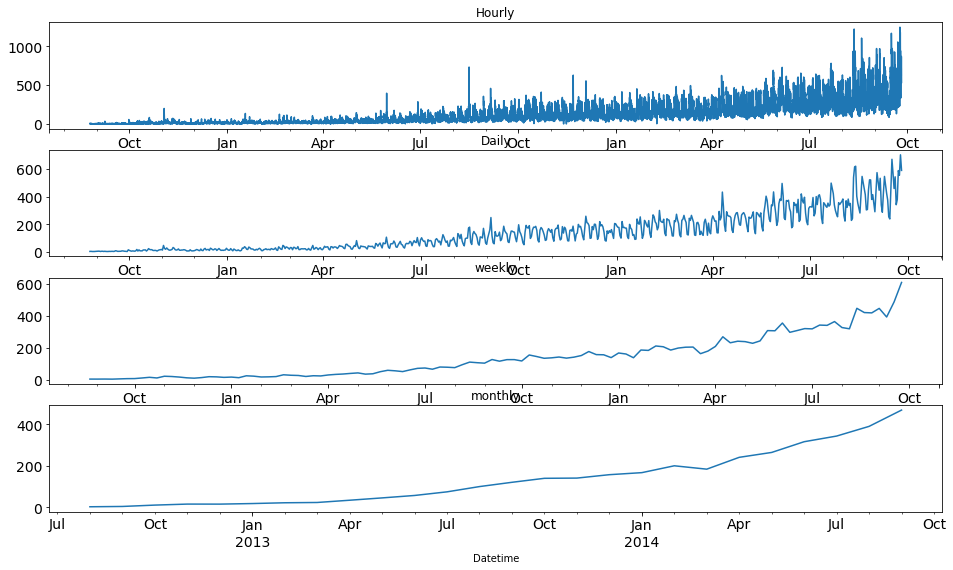

In [116]:
fig, axes = plt.subplots(4,1)
hourly.Count.plot(figsize=(16,9),ax=axes[0],title = 'Hourly',fontsize=14)
daily.Count.plot(figsize=(16,9),ax=axes[1],title='Daily',fontsize=14)
weekly.Count.plot(figsize=(16,9),ax=axes[2],title = 'weekly',fontsize=14)
monthly.Count.plot(figsize=(16,9),ax=axes[3],title='monthly',fontsize=14)

In [117]:
Test.index = Test['Datetime']

In [118]:
Test = Test.resample('D').mean()
Train = Train.resample('D').mean()

In [119]:
del Test['ID']
del Test['Hour']
del Train['Hour']

In [120]:
Train.tail(2)

,Count,Year,Month,Day,Day of Week,Weekend
Datetime,,,,,,
2014-09-24,702.333333,2014.0,9.0,24.0,2.0,0.0
2014-09-25,589.666667,2014.0,9.0,25.0,3.0,0.0


In [121]:
Test.head(2)

,Year,Month,Day,Day of Week,Weekend
Datetime,,,,,
2014-09-26,2014.0,9.0,26.0,4.0,0.0
2014-09-27,2014.0,9.0,27.0,5.0,1.0


In [122]:
X_Train = Train.ix['2012-08-25':'2014-06-24']
X_Test = Train.ix['2014-06-25':'2014-09-25']

In [128]:
X_Test_Pred = X_Test

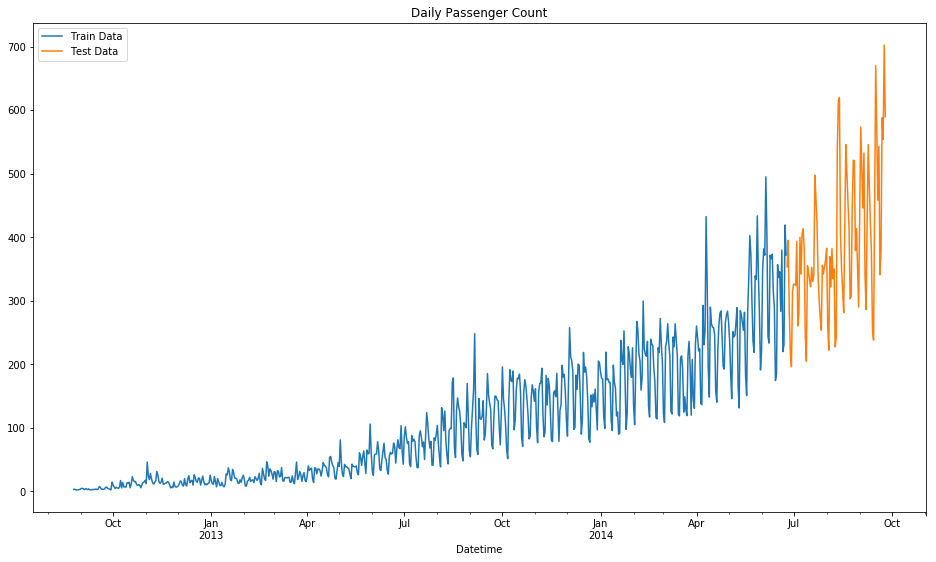

In [123]:
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
plt.title('Daily Passenger Count')
plt.legend()

# Naive Approach

In [125]:
X_Train_Count = np.asarray(X_Train['Count'])

In [129]:
X_Test_Pred['Naive'] = X_Train_Count[len(X_Train_Count)-1]

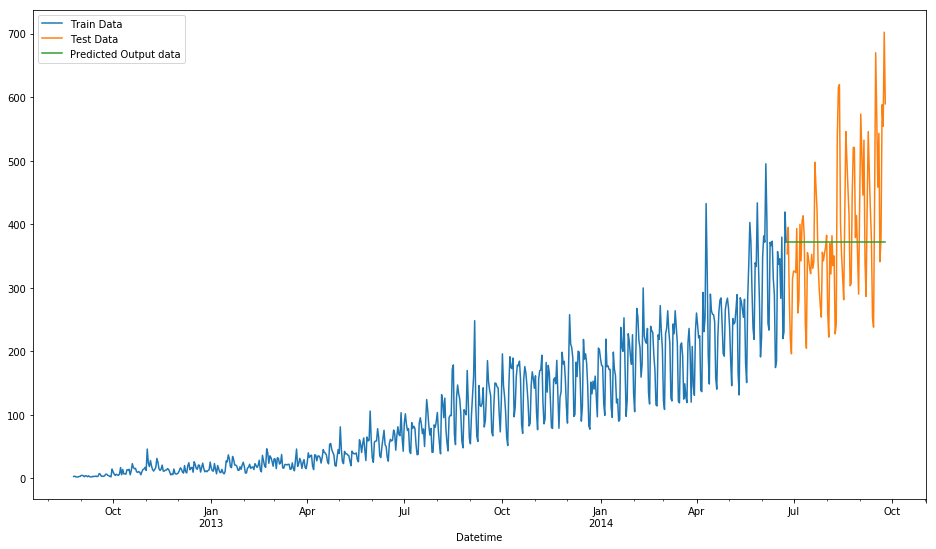

In [130]:
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.Naive.plot(figsize=(16,9),label='Predicted Output data')
plt.legend()

In [131]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['Naive'])))

111.79050467496724


# Moving Average Approach

In [132]:
X_Test_Pred['Moving_avg_10'] = X_Train['Count'].tail(10).mean()
X_Test_Pred['Moving_avg_20'] = X_Train['Count'].tail(20).mean()
X_Test_Pred['Moving_avg_50'] = X_Train['Count'].tail(50).mean()

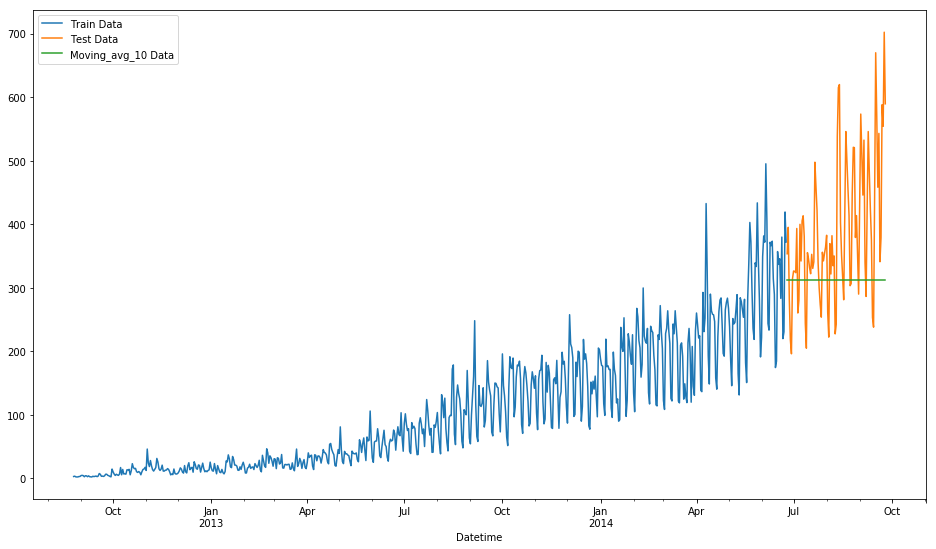

In [133]:
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.Moving_avg_10.plot(figsize=(16,9),label='Moving_avg_10 Data')
plt.legend()

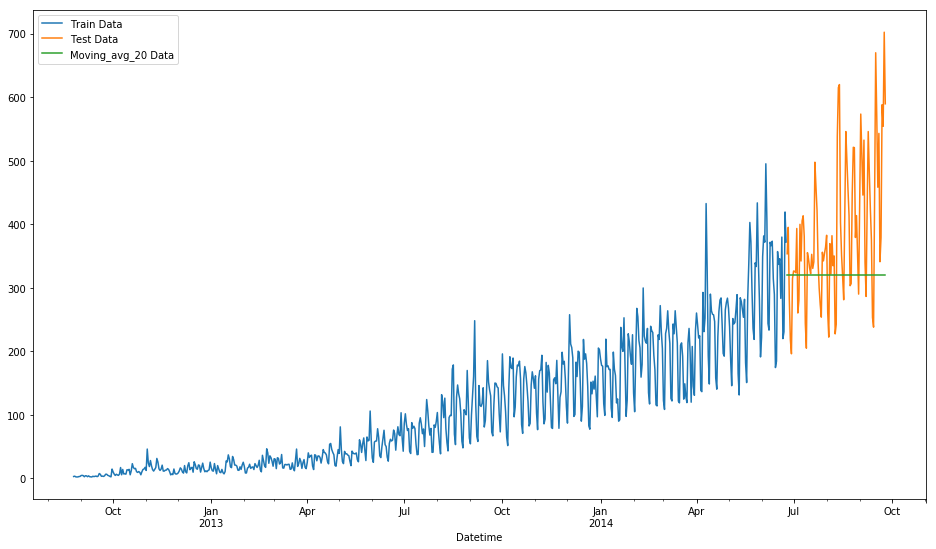

In [134]:
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.Moving_avg_20.plot(figsize=(16,9),label='Moving_avg_20 Data')
plt.legend()

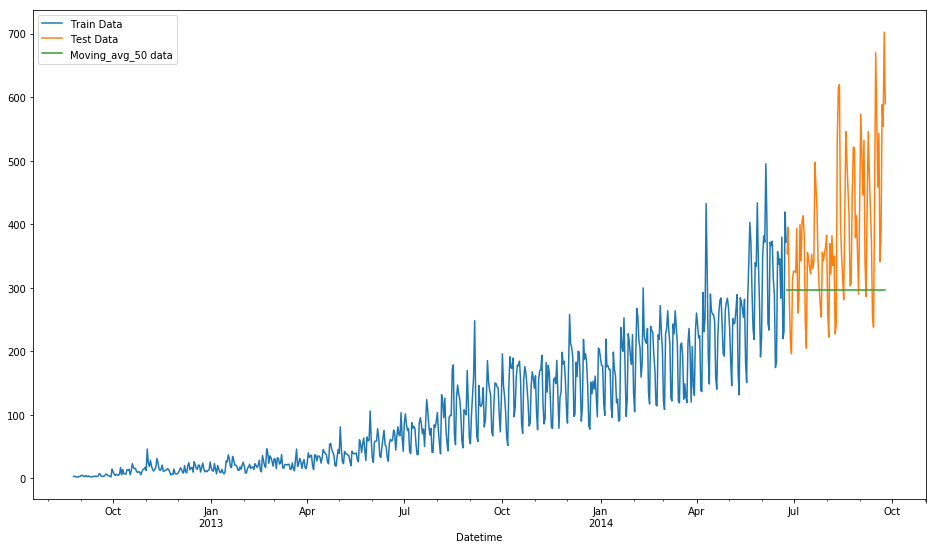

In [135]:
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.Moving_avg_50.plot(figsize=(16,9),label='Moving_avg_50 data')
plt.legend()

In [136]:
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['Moving_avg_10'])))
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['Moving_avg_20'])))
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['Moving_avg_50'])))

134.2373330895026
130.4498497755042
144.19175679986793


# Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
ses = SimpleExpSmoothing(X_Train_Count).fit(smoothing_level = 0.6, Optimized = False)
X_Test_Pred['SimpleExpSmoothing'] = ses.forecast(len(X_Test_Pred))
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.SimpleExpSmoothing.plot(figsize=(16,9),label='SimpleExpSmoothing data')
plt.legend()

In [ ]:
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['SimpleExpSmoothing'])))

# Holt's Linear Model - Include Trend Also (Holt)

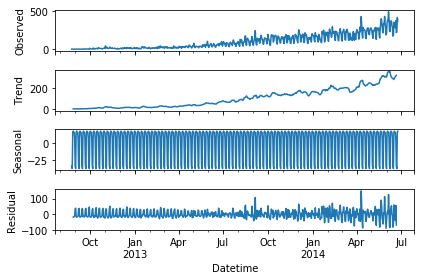

In [137]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(X_Train['Count']).plot()
plt.show()

In [ ]:
holt = Holt(X_Train_Count).fit(smoothing_level=0.3, smoothing_slope=0.1)
X_Test_Pred['holt'] = holt.forecast(len(X_Test_Pred))
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.holt.plot(figsize=(16,9),label='holt data')
plt.legend()

In [ ]:
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['holt'])))

# Holt's Winter Model - includes Trend and Season(Exponential Smoothing)

In [ ]:
holt_exp = ExponentialSmoothing(X_Train_Count).fit(seasonal_periods=7,trend='add',seasonal='add')
X_Test_Pred['holt_exp'] = holt_exp.forecast(len(X_Test_Pred))
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
X_Test_Pred.holt_exp.plot(figsize=(16,9),label='holt_exp data')
plt.legend()

In [ ]:
print (sqrt(mean_squared_error(X_Test['Count'],X_Test_Pred['holt_exp'])))

# Converting Daily to Hourly and Submitting Code

In [ ]:
submission = pd.read_csv('Sample_Submission_QChS6c3.csv')
submission['ID'] = Test_Original['ID']
Train_Original['ratio'] = Train_Original['Count']/Train_Original['Count'].sum()
temp = Train_Original.groupby(['Hour'])['ratio'].sum()
new_dict = {}
for i,value in enumerate(temp):
    new_dict[i] = value
new_dict
pd.DataFrame(temp).to_csv('Groupby.csv')

In [ ]:
Test['prediction'] = 313.033333
merge=pd.merge(Test, Test_Original, on=('Day' , 'Month', 'Year'), how='left')
merge['prediction'] = merge['Hour'].map(new_dict) * merge['prediction'] 
submission['Count'] = merge['prediction'].round().astype('int')
submission.to_csv('Submission.csv',index=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationery(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window = 24)
    rolstd = pd.rolling_std(timeseries, window = 24)
    
    #Plot Rolling Statistics
    plt.plot(timeseries,label ='Original', color = 'Red')
    plt.plot(rolmean, label='Rolling Mean',color = 'Blue')
    plt.plot(rolstd, label = 'Rolling Std', color = 'Green')
    plt.legend()
    plt.title('Rolling Mean & Standard deviation')
    plt.show(block=False)
    
    #Performong Dickey Fuller Test
    print ('Results of Dickey Fuller Test : ')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','P-Value','Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [ ]:
test_stationery(Train_Original['Count'])

In [ ]:
X_Train_log = np.log(X_Train['Count'])
X_Test_log = np.log(X_Test['Count'])

In [ ]:
moving_avg  = pd.rolling_mean(X_Train_log,24)
plt.plot(X_Train_log)
plt.plot(moving_avg,color='red')
plt.show()

In [ ]:
X_Train_log_moving_avg_difference = X_Train_log  - moving_avg

In [ ]:
X_Train_log_moving_avg_difference.dropna(inplace=True)
test_stationery(X_Train_log_moving_avg_difference)

In [ ]:
Train_log_diff = X_Train_log - X_Train_log.shift(1)

In [ ]:
test_stationery(Train_log_diff.dropna())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(X_Train_log.values,freq=24)

In [ ]:
trend=decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
plt.subplot(4,1,1)
plt.plot(X_Train_log,label='Original')
plt.subplot(4,1,2)
plt.plot(trend,label='trend')
plt.subplot(4,1,3)
plt.plot(seasonal,label='seasonal')
plt.subplot(4,1,4)
plt.plot(residual,label='residual')


In [ ]:
X_Train_log_decompose = pd.DataFrame(residual)
X_Train_log_decompose['Date'] = X_Train_log.index
X_Train_log_decompose.set_index('Date',inplace=True)
X_Train_log_decompose.dropna(inplace=True)

In [ ]:
test_stationery(X_Train_log_decompose[0])

In [ ]:
from statsmodels.tsa.ar_model import AR
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
data

In [ ]:
# fit model
model = AR(data)
model_fit = model.fit()
model_fit

In [ ]:
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
yhat

In [127]:
list1 = [] 
list2 = [] 
list3=list1 
  
if (list1 == list2): 
    print("True") 
else: 
    print("False") 
  
if (list1 is list2): 
    print("True") 
else: 
    print("False") 
  
if (list1 is list3): 
    print("True") 
else:     
    print("False") 
    
print(id(list1)) 
print(id(list2)) 
print(id(list3)) 

True
False
True
408529160
408529032
408529160
